# Fitting SEIR for France

In [1]:
from __future__ import division # always-float division
import numpy as np
import pandas as pd
import glob
import pprint
import os
import requests
from datetime import date

# Easy interactive plots
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Interactive plots in notebook
from IPython.display import HTML, Image, display
from ipywidgets.widgets import interact, IntSlider, FloatSlider, Layout, ToggleButton, ToggleButtons, fixed, Checkbox

# Maths
from scipy.integrate import odeint
import scipy.signal.windows as window
from sklearn.preprocessing import normalize
import scipy.stats as stats

# Long computations
from tqdm import tqdm_notebook as tqdm
import pickle

# Fitter
from lmfit import Model, Parameters, Parameter, report_fit, minimize

#Import from utils
from utils import *

import matplotlib.pyplot as plt

In [2]:
from utils import *
import glob

# Interactive plot layout options
style = {'description_width': '100px'}
slider_layout = Layout(width='99%')

In [3]:
# Relative path to EPI data folder
DATA_PATH = './data/clean/EPI'

# Studied country for OWID data
COUNTRY = 'France'
DEATHS_FILE = 'total_deaths_10juillet2020.csv'

# Display static (png) plots or interactive plotly (js) figures
STATIC_PLOTS = True

In [4]:
# Download OWID & Santé Publique data, write new file if new date
existing = glob.glob(DATA_PATH+"/*"+str(date.today())+".csv")

In [5]:
owid_file = update_owid(DATA_PATH)

Downloaded Our World In Data Coronavirus data to 
	./data/clean/EPI/owid_2021-04-09.csv


# Model fitting

## Fitting beta with stringency

In [6]:
from EPI_model import EPIfit

In [7]:
params_seir_beta_s = './params_new/params_SEIR_beta_strin.csv'

In [8]:
owid_file

'./data/clean/EPI/owid_2021-04-09.csv'

In [32]:
SEIR = EPIfit(model='SEIR', beta_sigmoid_step=True, mu_sigmoid_step=False, stringency_fit=True, PARAMS_FILE=params_seir_beta_s, OWID_FILE=owid_file,
                  HOSP_FILE=None, cutoff_date='2020-05-10', ratio_susceptible=1/1)

Params for stringency fit: Parameters([('Cs0', <Parameter 'Cs0', value=5.0, bounds=[2.0:6.0]>), ('Ls0', <Parameter 'Ls0', value=80.8, bounds=[0.0:100.0]>), ('as0', <Parameter 'as0', value=0.35, bounds=[0.235:3.0]>), ('bs0', <Parameter 'bs0', value=50.0, bounds=[20.0:100.0]>)])
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Cs0         6        2        6    1.171     True     None     None
Ls0     81.58        0      100    2.324     True     None     None
as0     0.235    0.235        3  0.01774     True     None     None
bs0     44.65       20      100   0.4807     True     None     None


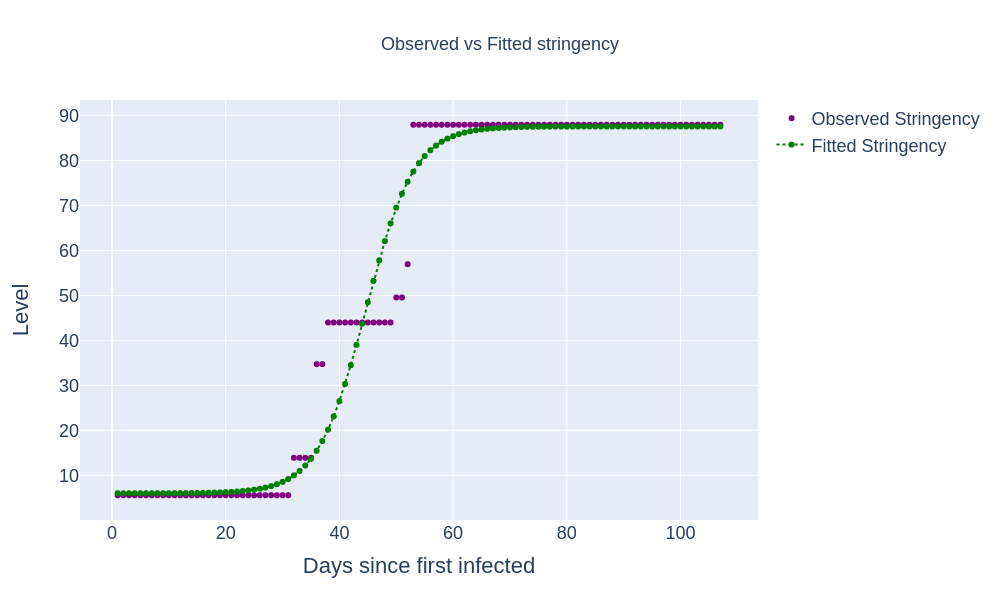

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 219
    # data points      = 107
    # variables        = 5
    chi-square         = 1.9467e+10
    reduced chi-square = 1.9085e+08
    Akaike info crit   = 2045.04891
    Bayesian info crit = 2058.41305
##  Warning: uncertainties could not be estimated:
    C_0:    at initial value
    C_0:    at boundary
    L_0:    at initial value
    L_0:    at boundary
    b_0:    at boundary
[[Variables]]
    C_0:    0.37800000 (init = 0.378)
    L_0:   -0.23200000 (init = -0.232)
    a_0:    0.235 (fixed)
    b_0:    74.9999752 (init = 69.99095)
    sigma:  0.49990840 (init = 0.14)
    gamma:  0.10848154 (init = 0.05)
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
C_0       0.378    0.378     0.38     None     True     None     None
L_0      -0.232   -0.232     -0.2     None     True     None     None
a_0       0.235    0.235    0.335     None    Fa

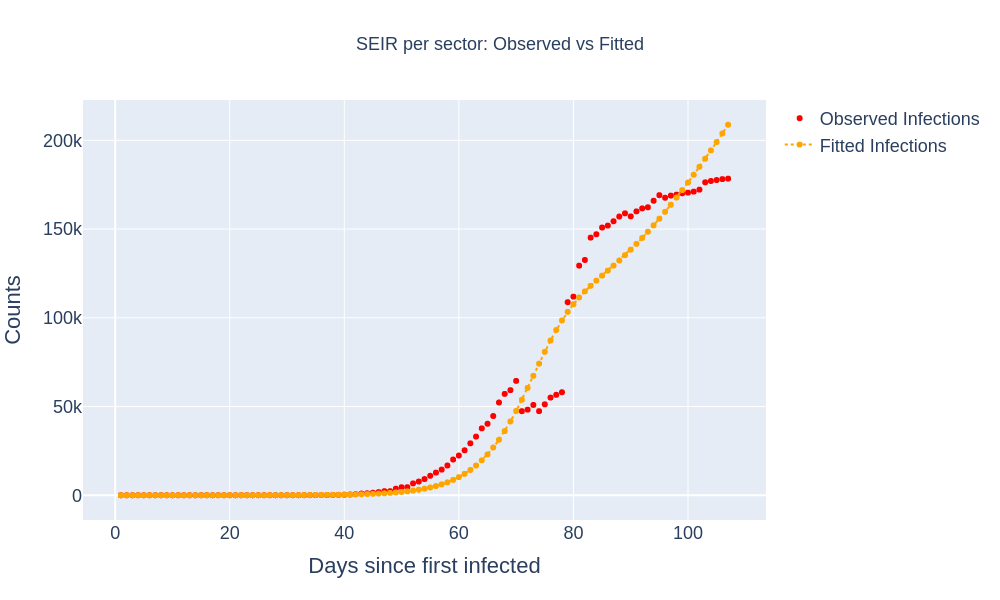

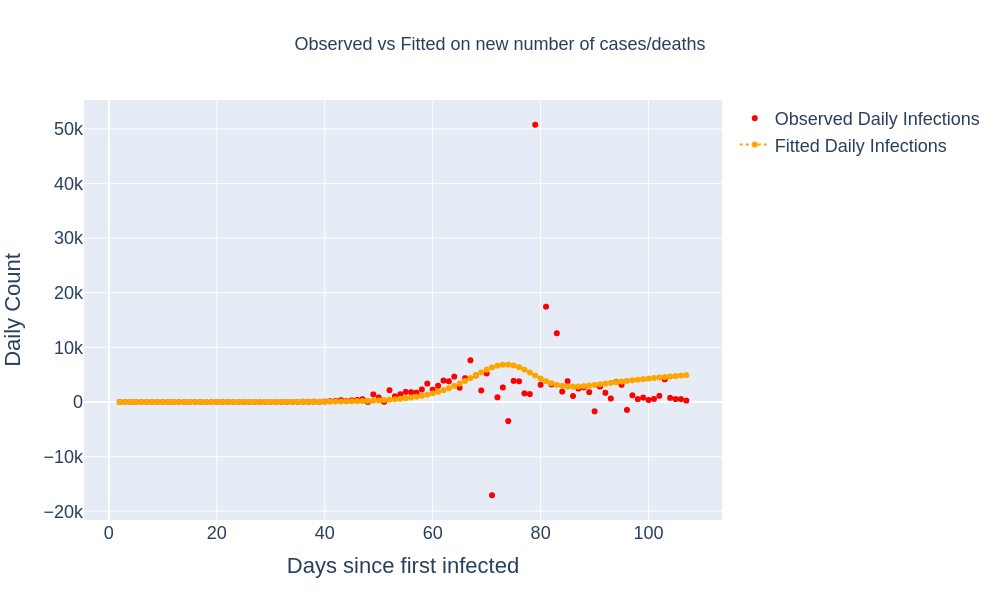

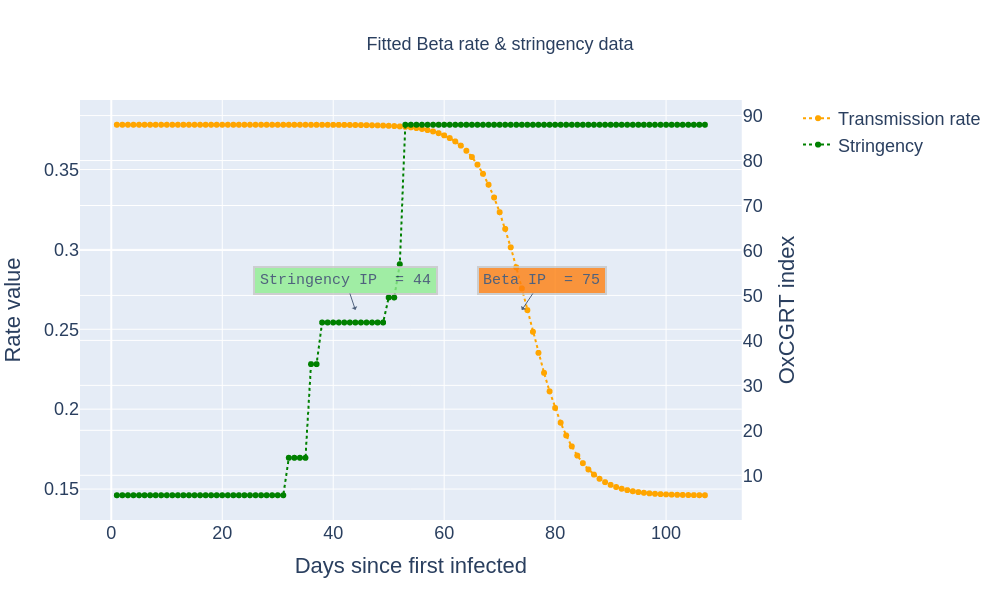

In [16]:
s, results, N, final = SEIR.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True
                               remove_artefacts=False)

In [ ]:
## Without artefacts

Params for stringency fit: Parameters([('Cs0', <Parameter 'Cs0', value=5.0, bounds=[2.0:6.0]>), ('Ls0', <Parameter 'Ls0', value=80.8, bounds=[0.0:100.0]>), ('as0', <Parameter 'as0', value=0.35, bounds=[0.235:3.0]>), ('bs0', <Parameter 'bs0', value=50.0, bounds=[20.0:100.0]>)])
Name     Value      Min      Max   Stderr     Vary     Expr Brute_Step
Cs0         6        2        6    1.171     True     None     None
Ls0     81.58        0      100    2.324     True     None     None
as0     0.235    0.235        3  0.01774     True     None     None
bs0     44.65       20      100   0.4807     True     None     None


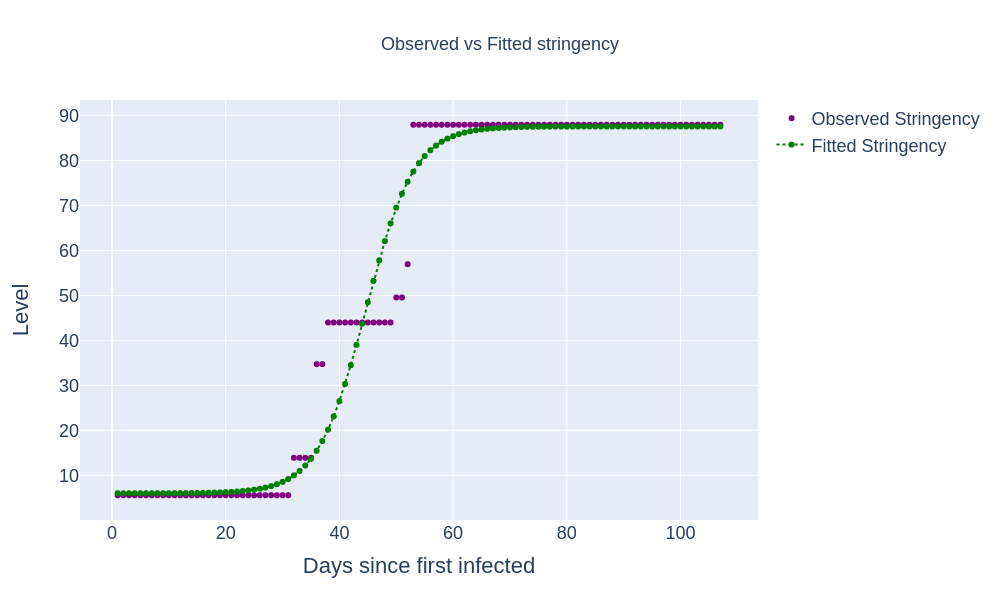

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 208
    # data points      = 107
    # variables        = 5
    chi-square         = 7.5525e+09
    reduced chi-square = 74043798.1
    Akaike info crit   = 1943.73731
    Bayesian info crit = 1957.10146
##  Warning: uncertainties could not be estimated:
    C_0:    at initial value
    C_0:    at boundary
    L_0:    at initial value
    L_0:    at boundary
    b_0:    at boundary
[[Variables]]
    C_0:    0.40500000 (init = 0.405)
    L_0:   -0.39500000 (init = -0.395)
    a_0:    0.235 (fixed)
    b_0:    66.6999995 (init = 66.5)
    sigma:  0.13265298 (init = 0.14)
    gamma:  0.00590422 (init = 0.05)
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
C_0       0.405    0.405     0.41     None     True     None     None
L_0      -0.395   -0.395     -0.2     None     True     None     None
a_0       0.235    0.235    0.335     None    False 

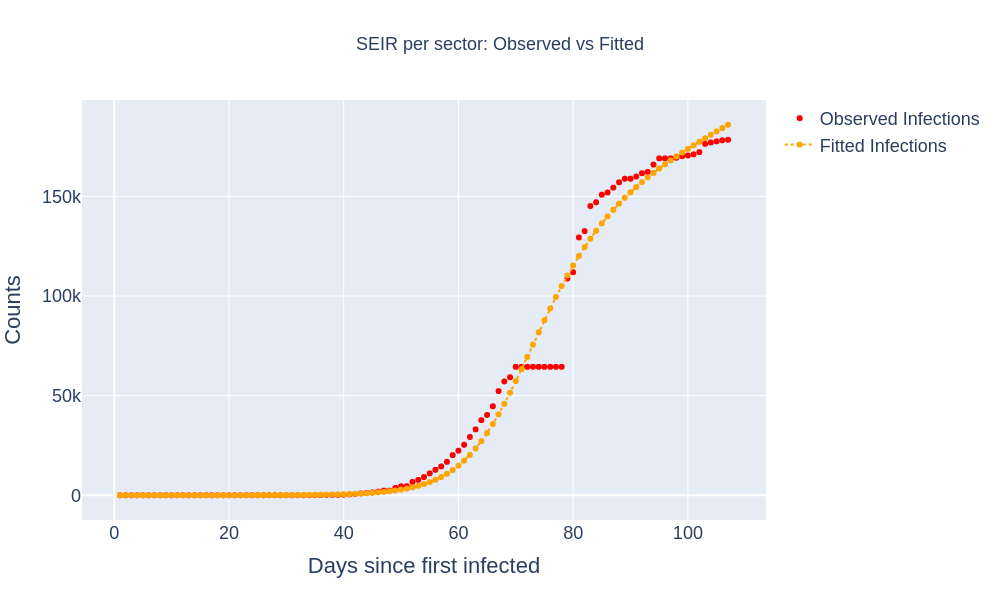

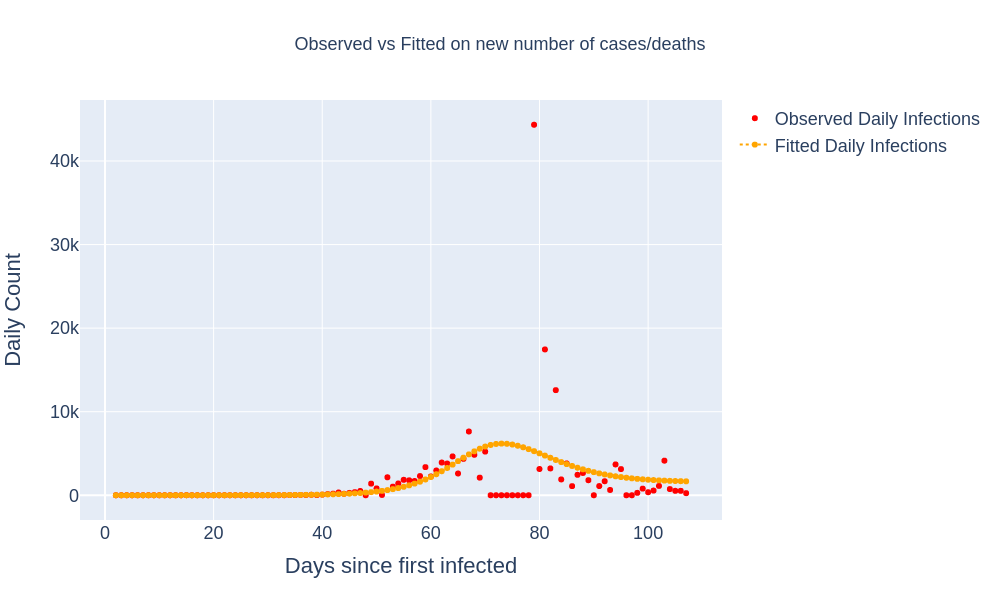

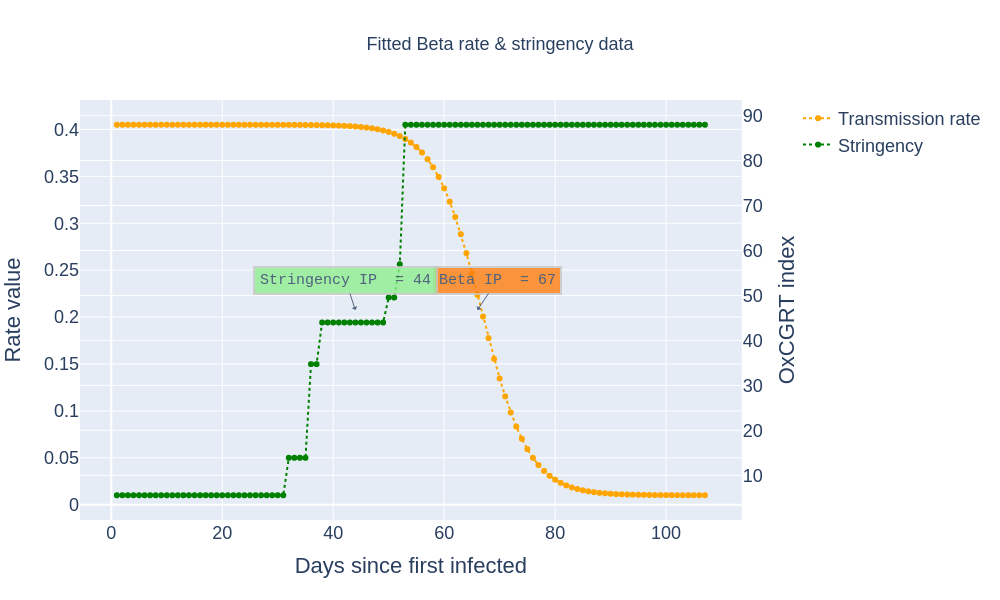

In [33]:
s, results, N, final = SEIR.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True,
                               remove_artefacts=True)

## No stringency

In [11]:
params_seir = './params_new/params_SEIR.csv'

In [14]:
SEIR_ = EPIfit(model='SEIR', beta_sigmoid_step=False, mu_sigmoid_step=False, stringency_fit=False, PARAMS_FILE=params_seir, OWID_FILE=owid_file,
                  HOSP_FILE=None, cutoff_date='2020-05-10', ratio_susceptible=1/350)

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 132
    # data points      = 107
    # variables        = 3
    chi-square         = 2.3417e+10
    reduced chi-square = 2.2516e+08
    Akaike info crit   = 2060.81766
    Bayesian info crit = 2068.83615
[[Variables]]
    beta:   0.60547432 +/- 0.23961261 (39.57%) (init = 0.5)
    sigma:  0.06873901 +/- 0.01184756 (17.24%) (init = 0.142857)
    gamma:  2.0594e-11 +/- 0.04806648 (233397267984.47%) (init = 0.01)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, gamma)  =  0.994
    C(beta, sigma)  = -0.886
    C(sigma, gamma) = -0.832
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta     0.6055      0.1      1.8   0.2396     True     None     None
gamma  2.059e-11        0      1.5  0.04807     True     None     None
sigma   0.06874        0        2  0.01185     True     None     None
107 fitted days out of 107 available d

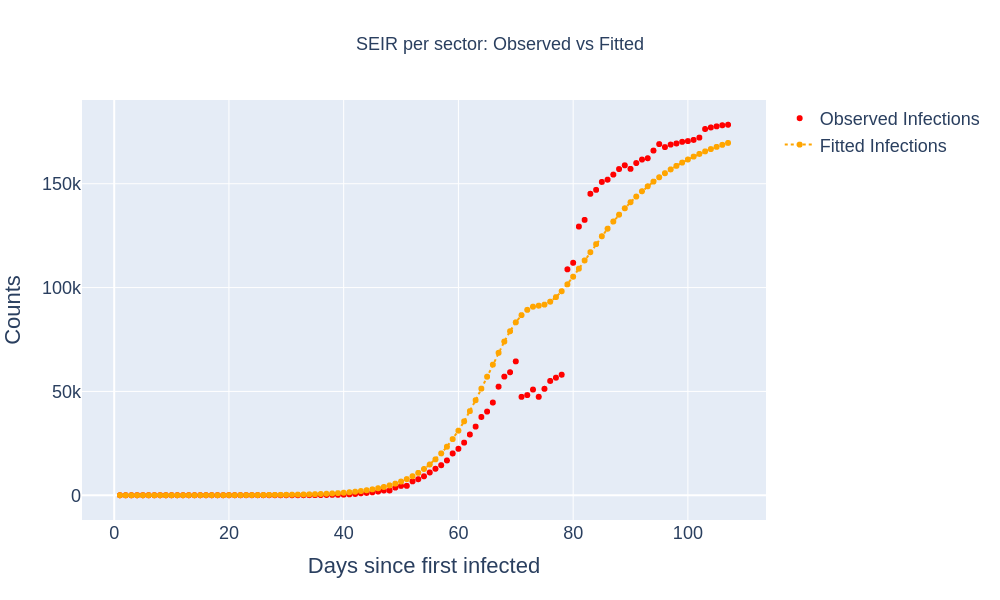

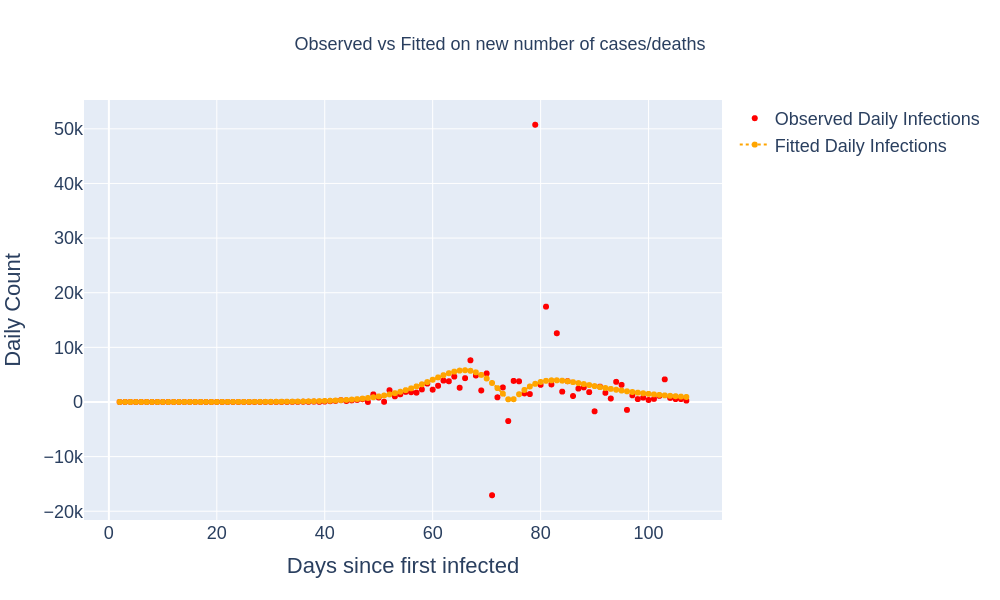

In [24]:
d, r, n, fitted = SEIR_.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True)

In [ ]:
##Without artefacts

Fitting France data with 0 last days out
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 107
    # variables        = 3
    chi-square         = 6.5971e+09
    reduced chi-square = 63433872.1
    Akaike info crit   = 1925.26655
    Bayesian info crit = 1933.28504
[[Variables]]
    beta:   0.99999998 +/- 0.19563811 (19.56%) (init = 0.5)
    sigma:  0.07971328 +/- 0.03118822 (39.13%) (init = 0.1)
    gamma:  0.15286505 +/- 0.38537701 (252.10%) (init = 0.1)
[[Correlations]] (unreported correlations are < 0.100)
    C(beta, gamma)  =  0.998
    C(sigma, gamma) =  0.982
    C(beta, sigma)  =  0.968
None
Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
beta          1      0.1        1   0.1956     True     None     None
gamma    0.1529        0      1.5   0.3854     True     None     None
sigma   0.07971     0.05      0.5  0.03119     True     None     None
107 fitted days out of 107 available data points


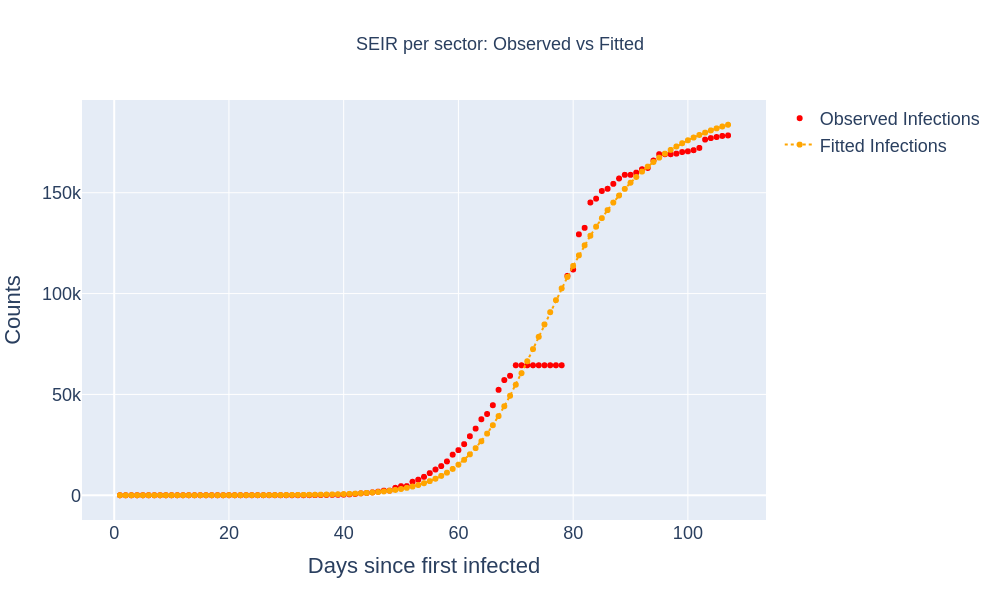

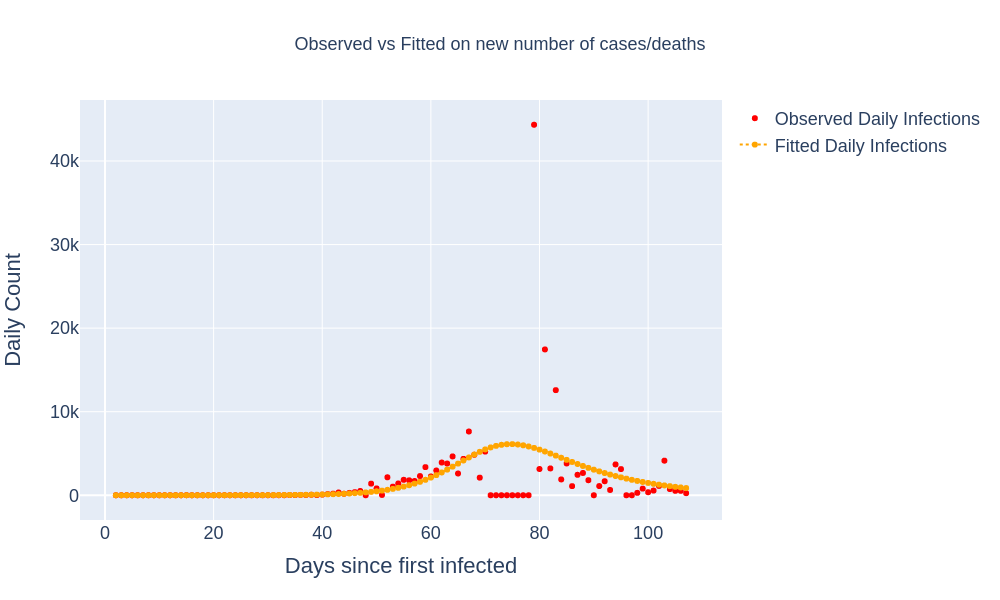

In [15]:
d, r, n, fitted = SEIR_.fit(country='France', out_days=0, plot=True, disease_vary=True, sector_props=[100.0], STATIC_PLOTS=True,
                           remove_artefacts=True)